0.8083333333333333

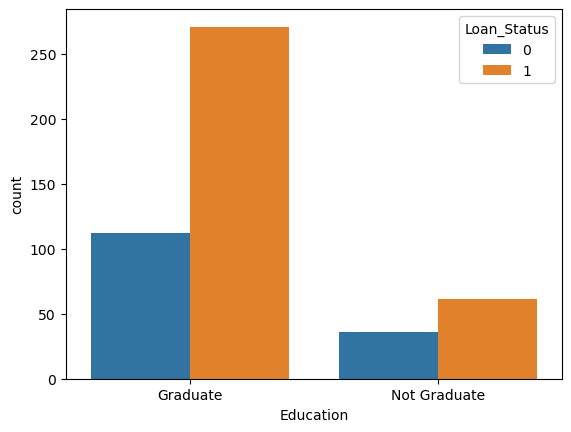

In [1]:
import pandas as pd
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#READ DATASET
dataset = pd.read_csv('loan_data.csv')

#FIRST VIEW THE FIRST FIVE DATA
dataset.head()

#SEE THE ROWS AND COLUMNS
dataset.shape

#SHOWS THE COUNT OF EMPTY COLUMNS
dataset.describe()

#FIND WHICH COLUMNS HAVE NULL VALUES
dataset.isnull().sum()


#DROP ALL COLUMNS WITH NULL VALUES AND VIEW
dataset = dataset.dropna()
dataset.isnull().sum()


#CHANGE DATA TO BINARY
dataset.replace({"Loan_Status":{'N':0,'Y':1}}, inplace=True)


#VIEW DATA
dataset.head()


#COUNT THE VALUE OF THE DEPENDENTS COLUMN
dataset['Dependents'].value_counts()


#REPLACING VALUES OF THE DEPENDENTS
dataset.replace({"Dependents":{'3+':4}}, inplace=True)


dataset['Dependents'].value_counts()


#PLOT A GRAPH WITH EDUCATION ON X-AXIS HUE AS THE LEGEND
sns.countplot(x='Education',hue='Loan_Status',data=dataset)


#REPLACING/RESTRUCTURING THE DATA TO BINARY
dataset.replace({"Married":{'No':0,'Yes':1}, "Gender":{'Male':1,'Female':0},"Self_Employed":{'Yes':1,'No':0},"Property_Area":{'Rural':0,'Semiurban':1,'Urban':2},"Education":{'Graduate':1,'Not Graduate':0}}, inplace=True)

 

#VIEW THE DATA
dataset.head()

#SPLITTING DATA INTO TWO VARIABLES.
x=dataset.drop(columns=['Loan_ID','Loan_Status'],axis=1)

y=dataset['Loan_Status']
dataset.head()

x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,random_state=2)

#USING THE SVM ALGORITHM
model = svm.SVC(kernel='linear')

#TRAIN THE MODEL
model.fit(x_train,y_train)

x_test_prediction = model.predict(x_test)

accuracy_test = accuracy_score(x_test_prediction,y_test)

accuracy_test

In [2]:
input_data=(1,1,4,1,0,9504,0,275,360,1,0)
import numpy as np
input_data_as_numpy=np.asarray(input_data)


In [3]:
input_data_reshaped=input_data_as_numpy.reshape(1,-1)
prediction = model.predict(input_data_reshaped)
if(prediction[0]==0):
    print('You are denied loan')
else:
    print('You are granted loan')

You are granted loan


C:\Users\Pokua\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [ ]:
#SAVING THE NEW DATASET FILE
# import pickle
# trained_data= "dataset.pkl"

# with open(trained_data, 'wb') as file:  
#     pickle.dump(model, file)

import pickle
trained_data = 'model.sav'
pickle.dump(model,open(trained_data,'wb'))